# Prediction with Different Models

In this section, the test data (`X_test`) is applied to each of the different models, and the prediction results are stored in their corresponding variables. The models are as follows:

- Prediction with the **Logistic Regression** model
- Prediction with the **KNN** model
- Prediction with the **SVM** model
- Prediction with the **Random Forest** model
- Prediction with the **XGBoost** model
- Prediction with the **MLP** model

Each of these models is used separately to predict the classes based on the test data `X_test`, and the prediction results are stored in different variables.


In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


In [3]:
X_test = pd.read_csv('traintest\X_test.csv')
y_test = pd.read_csv('traintest\y_test.csv').values.ravel()

In [4]:
logisticregression = joblib.load('logistic_regression_model.joblib') 
knn = joblib.load('knn_model.joblib') 
svm = joblib.load('svm_model.joblib') 
randomforest = joblib.load('randomforest_model.joblib') 
xgboost = joblib.load('xgboost_model.joblib') 
mlp = joblib.load('mlp_model.joblib') 

In [5]:
y_logisticregression = logisticregression.predict(X_test)
y_knn = knn.predict(X_test)
y_svm = svm.predict(X_test)
y_randomforest = randomforest.predict(X_test)
y_xgboost = xgboost.predict(X_test)
y_mlp = mlp.predict(X_test)

In [6]:
class_labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
models = {
    "Logistic Regression": y_logisticregression,
    "KNN": y_knn,
    "SVM": y_svm,
    "Random Forest": y_randomforest,
    "XGBoost": y_xgboost,
    "MLP": y_mlp
}

# Model Evaluation Using Confusion Matrix

In this section, we used confusion matrices to compare the performance of different models. These matrices were visually displayed for each model, allowing for a clearer view of how well each model predicted the classes.

All models, except for a few specific cases, predicted most classes correctly. However, between class 3 (CALI) and class 6 (SIRA), there were significant misclassifications. It appears that there are similarities between these two classes, which led to the models predicting these classes interchangeably.


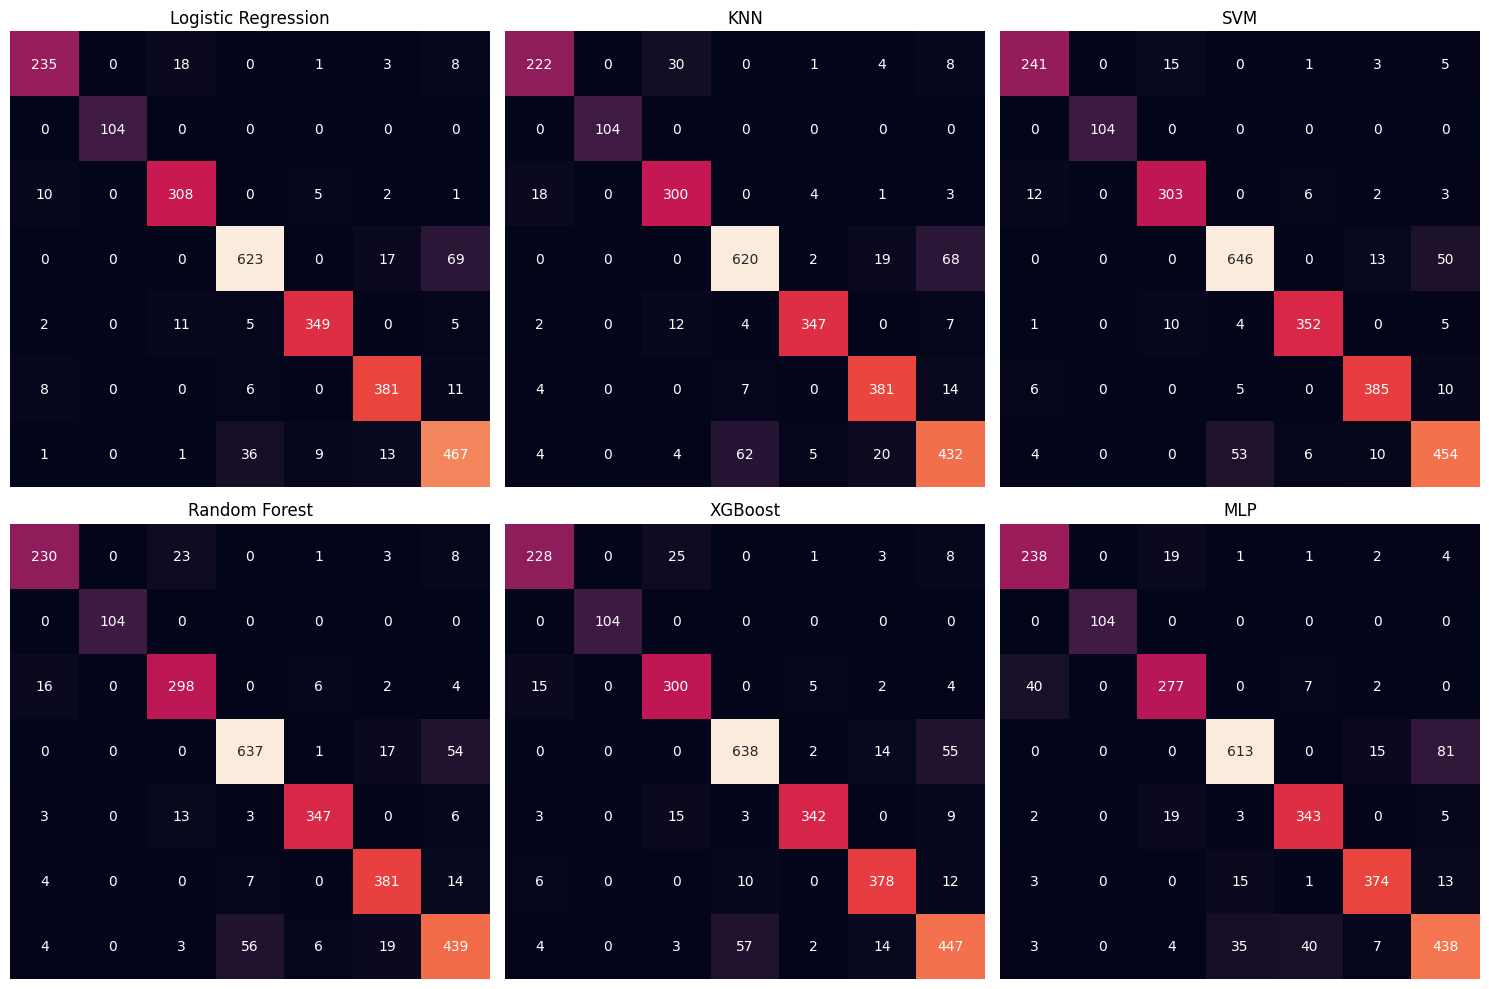

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  

for ax, (model_name, y_pred) in zip(axes.flatten(), models.items()):
    cm = confusion_matrix(y_test, y_pred) 
    sns.heatmap(cm, annot=True, fmt="d", ax=ax, cbar=False, 
                xticklabels=[], yticklabels=[])
    ax.set_title(model_name)  
    

plt.tight_layout() 
plt.show()

# Classification Report for Different Models

In this section, classification reports for five different models, including Logistic Regression, KNN, SVM, Random Forest, XGBoost, and MLP, are provided. These reports include `precision`, `recall`, `f1-score`, and `accuracy` for each class.

#### Results:

All models achieved high accuracy and were able to predict class 1 with 100% precision. Additionally, all models had the lowest precision for class 6.




In [10]:
for model_name, y_pred in models.items():
    print(f"\n🔹 Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred, digits=4))


🔹 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0     0.9180    0.8868    0.9021       265
           1     1.0000    1.0000    1.0000       104
           2     0.9112    0.9448    0.9277       326
           3     0.9299    0.8787    0.9036       709
           4     0.9588    0.9382    0.9484       372
           5     0.9159    0.9384    0.9270       406
           6     0.8324    0.8861    0.8585       527

    accuracy                         0.9107      2709
   macro avg     0.9237    0.9247    0.9239      2709
weighted avg     0.9121    0.9107    0.9109      2709


🔹 Classification Report for KNN:
              precision    recall  f1-score   support

           0     0.8880    0.8377    0.8621       265
           1     1.0000    1.0000    1.0000       104
           2     0.8671    0.9202    0.8929       326
           3     0.8947    0.8745    0.8845       709
           4     0.9666    0.9328    0.9494     

# Explanation of Accuracy:
**Accuracy** measures the percentage of correct predictions made by the model relative to the total number of samples. It is calculated by dividing the number of correct predictions by the total number of samples. Although accuracy is a simple and widely used metric, it may be misleading in cases of imbalanced classes.

In these results, the SVM model achieved the highest accuracy of 0.92, while the MLP model had the lowest accuracy of 0.88. The other models also performed well, with relatively small differences in accuracy.


In [11]:
accuracy_scores = {model_name: accuracy_score(y_test, y_pred) for model_name, y_pred in models.items()}
sorted_accuracy = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)
print("Accuracy Scores (Sorted):")
for model_name, acc in sorted_accuracy:
    print(f"{model_name}: {acc:.2f}")

Accuracy Scores (Sorted):
SVM: 0.92
Logistic Regression: 0.91
XGBoost: 0.90
Random Forest: 0.90
KNN: 0.89
MLP: 0.88


# Explanation of F1 Score:
The **F1 Score** is the harmonic mean of **Precision** and **Recall**. This metric is useful in classification models when the data is imbalanced, as it balances the trade-off between accuracy and the model's ability to identify actual positive samples. Essentially, the F1 Score provides an overall assessment of the model's quality, considering both precision and recall.

In the results, the **SVM** model achieved the highest F1 Score of 0.93, while the **MLP** model had the lowest F1 Score of 0.89. The other models showed similar performance, indicating good overall performance in identifying correct samples.


In [12]:
f1_scores = {model_name: f1_score(y_test, y_pred, average='macro') for model_name, y_pred in models.items()}
sorted_f1_score = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)
print("F1 Scores (Sorted):")
for model_name, f1 in sorted_f1_score:
    print(f"{model_name}: {f1:.2f}")

F1 Scores (Sorted):
SVM: 0.93
Logistic Regression: 0.92
XGBoost: 0.91
Random Forest: 0.91
KNN: 0.90
MLP: 0.89


# Interpretation of ROC Curves

* **Horizontal Axis (False Positive Rate):** Indicates how often the model incorrectly classifies beans that do not belong to a specific class as belonging to that class.
* **Vertical Axis (True Positive Rate):** Indicates how often the model correctly classifies beans that actually belong to a specific class.
* **ROC Curve:** The closer the curve is to the upper left corner, the better the model's performance.
* **AUC (Area Under the Curve):** A numerical measure of the model's overall performance. The closer the AUC is to 1, the better the model.

Based on the plotted graphs, the SVM model has the best results because the curves of its classes are closer to the upper left corner compared to the other models.

In [19]:
y_logisticregression_prob = logisticregression.predict_proba(X_test)
y_knn_prob = knn.predict_proba(X_test)
y_svm_prob = svm.predict_proba(X_test)
y_randomforest_prob = randomforest.predict_proba(X_test)
y_xgboost_prob = xgboost.predict_proba(X_test)
y_mlp_prob = mlp.predict_proba(X_test)

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

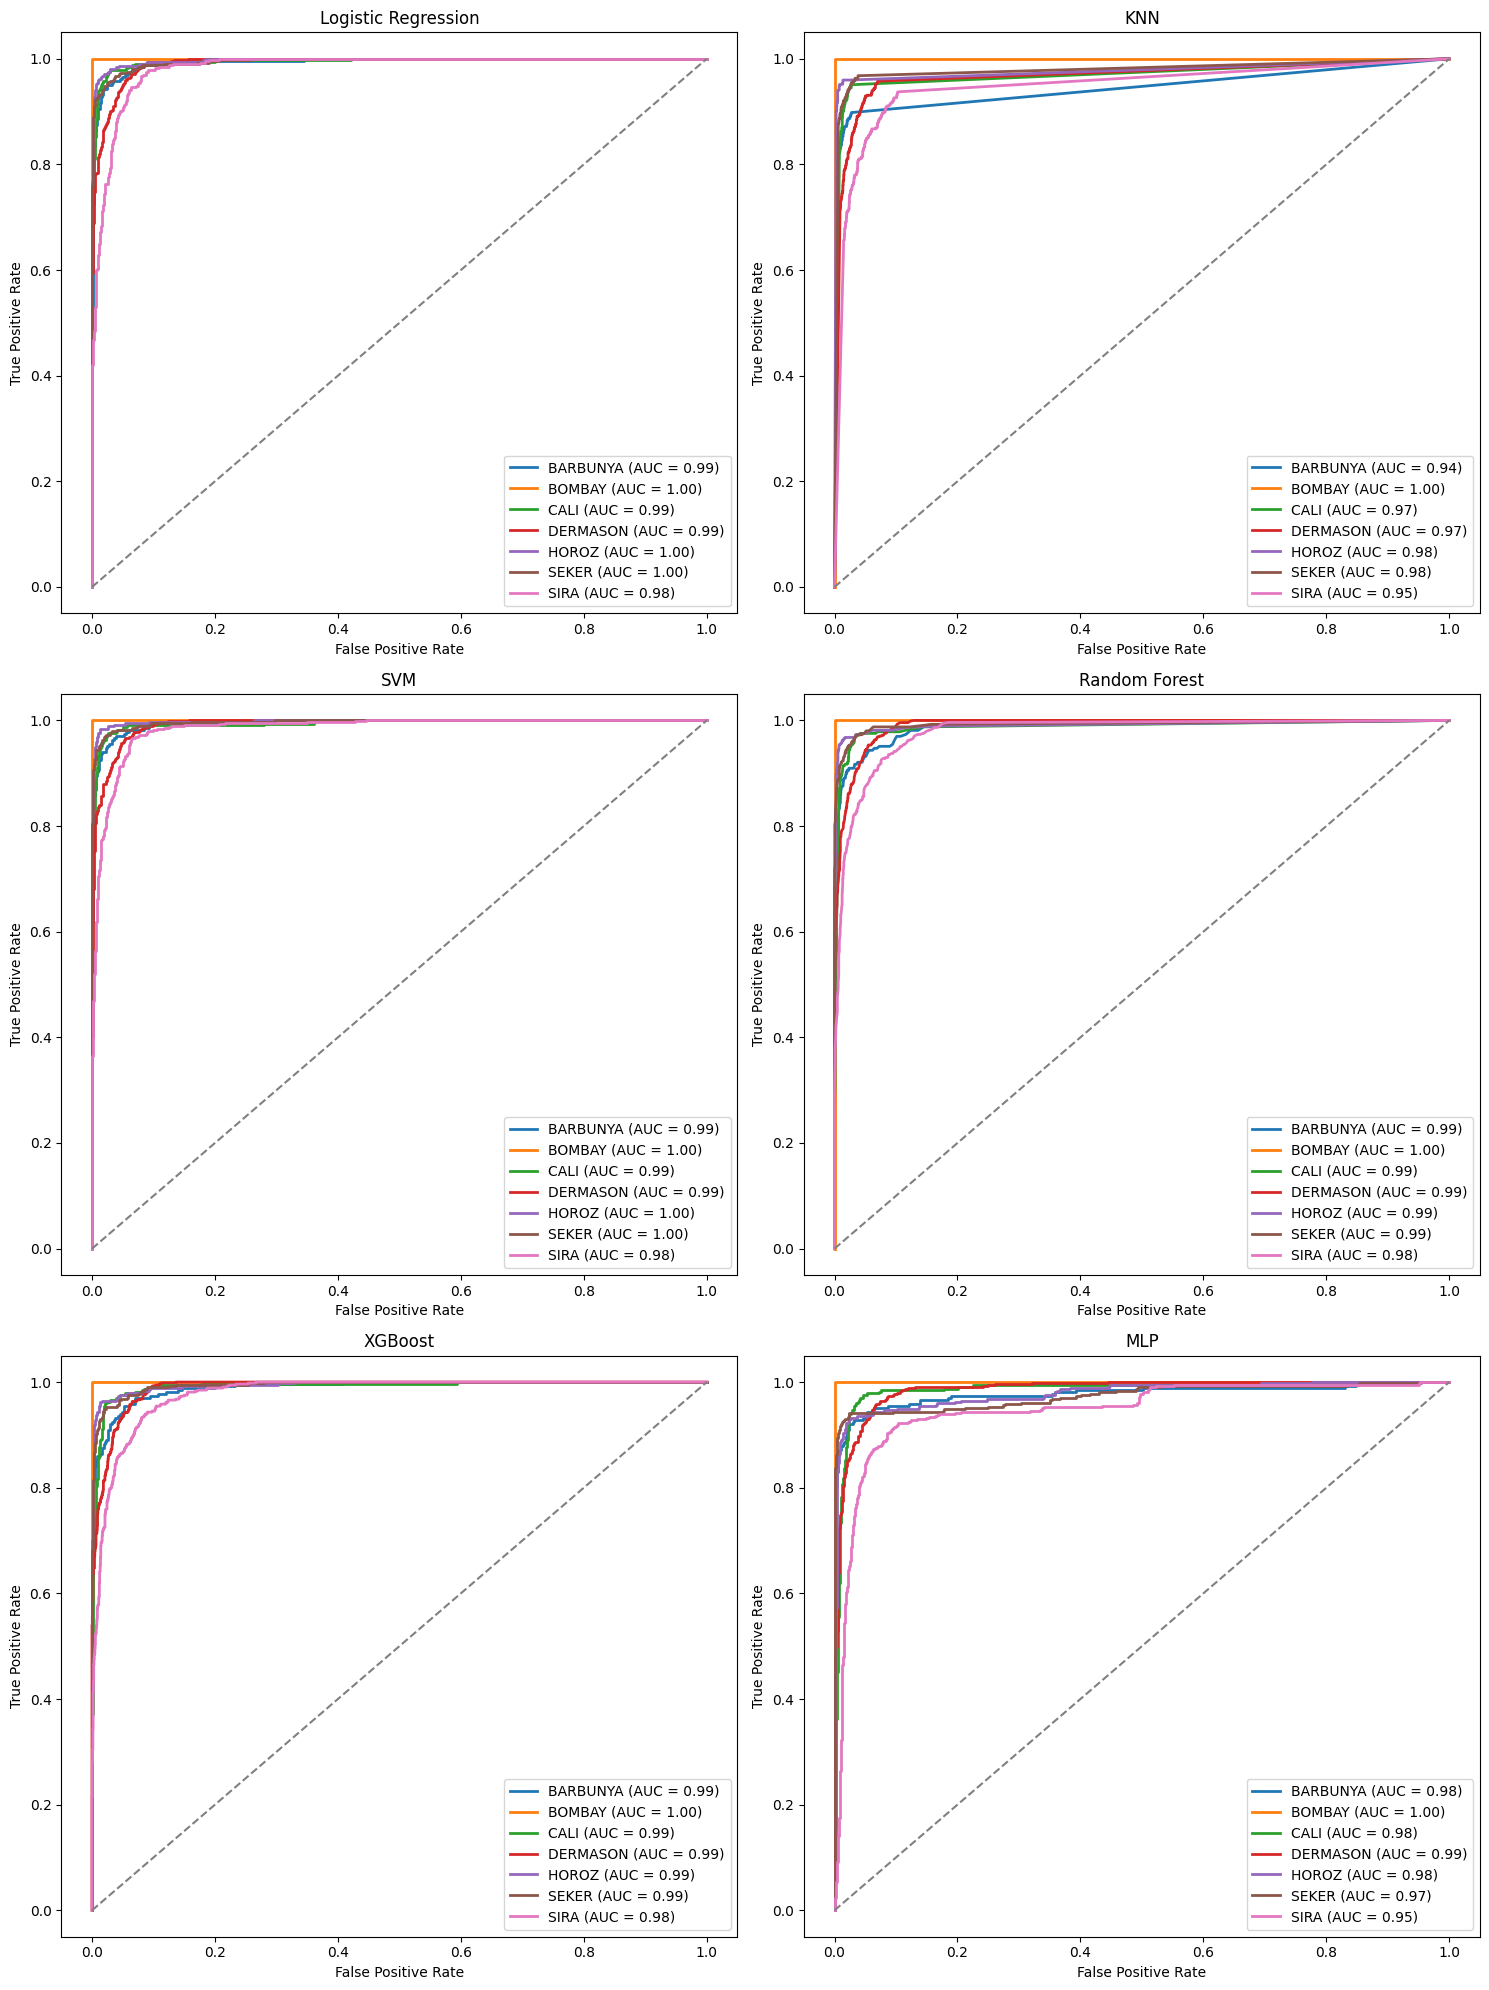

In [ ]:
model_probs = {
    "Logistic Regression": y_logisticregression_prob,
    "KNN": y_knn_prob,
    "SVM": y_svm_prob,
    "Random Forest": y_randomforest_prob,
    "XGBoost": y_xgboost_prob,
    "MLP": y_mlp_prob
}

fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()


for idx, (model_name, y_prob) in enumerate(model_probs.items()):
    ax = axes[idx]
    
    for i, class_label in enumerate(class_labels):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{class_label} (AUC = {roc_auc:.2f})')
    
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')
    ax.set_title(model_name)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Conclusion:

After a comprehensive analysis and comparison of the performance of various classification models on the bean dataset, considering Accuracy, F1-score, and ROC curves with AUC values, it is conclusively determined that the **Support Vector Machine (SVM) model** demonstrates the most outstanding performance.